### Sales Prediction
(Simple Linear Regression)

**Name:** Adiel Delgado Silva & Lesly Jimenez

#### Import Libraries

In [2]:
# Data Manipulation

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

# Linear Regression
from sklearn.linear_model import LinearRegression

# Sample split
from sklearn.model_selection import train_test_split

# Model Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


#### Import the Dataset

In [3]:
df = pd.read_csv("Salary_dataset.csv")

#### Data Inspection

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [5]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [6]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


#### Exploratory Data Analysis


##### Outlier Analysis

<Axes: ylabel='Salary'>

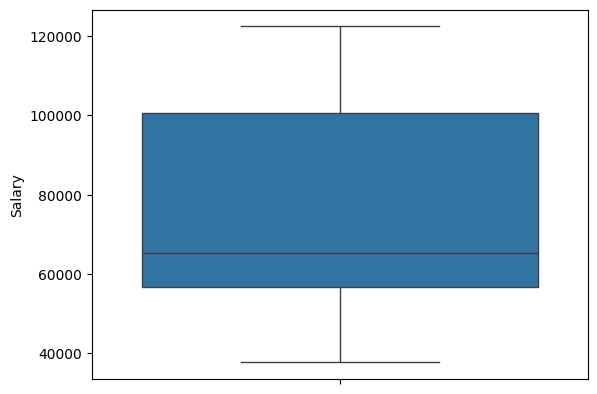

In [7]:
#Realiza cuanta dispersion hay en los datos
#Usando un Boxplot
sns.boxplot(df["Salary"])

<Axes: ylabel='YearsExperience'>

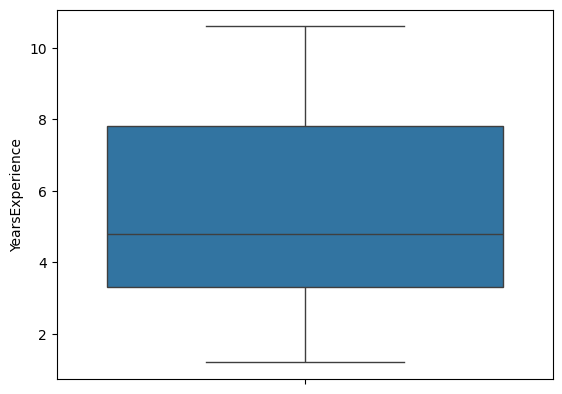

In [8]:
sns.boxplot(df["YearsExperience"])

##### Correlation Analysis

<Axes: xlabel='YearsExperience', ylabel='Salary'>

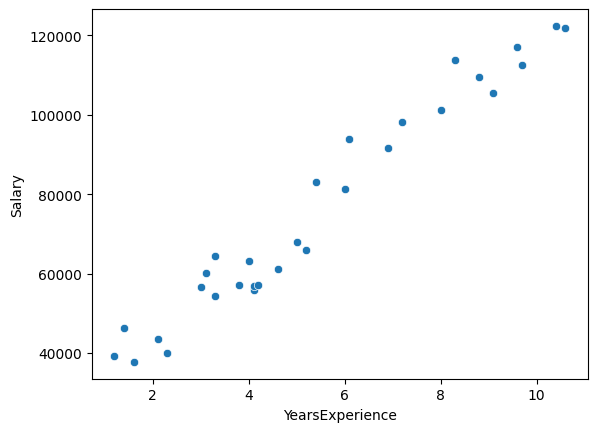

In [9]:
sns.scatterplot(df, x=df["YearsExperience"], y=(df["Salary"]))

#### Building the model

##### Separating predictor and target

In [10]:
X = df[["YearsExperience"]]
y = df[["Salary"]]

##### Train-Test split

In [ ]:
#Entrenar el modelo con datos que nunca se han usado.
#Generaliza usando un split, para asi poder predecir que hacer en casos no vistos.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3)
#Se entrenara con el 70% de los datos y se usaran el 30% restante para probarlo.

In [12]:
X_train.shape

(21, 1)

In [13]:
y_train.shape

(21, 1)

##### Train the model

In [14]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

##### Evaluate the model with training data

In [16]:
y_pred = model.predict(X_train)
y_pred

array([[ 89173.85689217],
       [ 39306.8463809 ],
       [ 99523.61379074],
       [ 37425.07239935],
       [ 73178.77804894],
       [122104.90156943],
       [107050.70971697],
       [ 53420.15124258],
       [ 80705.87397517],
       [ 55301.92522414],
       [ 91996.51786451],
       [ 62829.02115037],
       [ 62829.02115037],
       [ 35543.29841779],
       [ 67533.45610426],
       [114577.8056432 ],
       [ 61888.13415959],
       [115518.69263398],
       [ 52479.26425181],
       [ 45893.05531635],
       [ 71297.00406738]])

In [17]:
mse = mean_squared_error(y_train,y_pred)
r2 = r2_score(y_train, y_pred)
#Que tanto se diferencian los valores predecidos con el real
print("MSE: ", mse)
#Muestra el valor en porcentaje de accuracy
print("R2: ", r2)

MSE:  21529613.642102726
R2:  0.9697823433999081


##### Evaluate the model with Test data

In [18]:
y_pred = model.predict(X_test)
y_pred

array([[ 55301.92522414],
       [ 60006.36017803],
       [102346.27476308],
       [ 81646.76096594],
       [123986.67555098],
       [ 44011.2813348 ],
       [ 75060.55203049],
       [ 63769.90814115],
       [109873.3706893 ]])

In [19]:
#Ahora se usan los datos con los que se probó el modelo
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
#Que tanto se diferencian los valores predecidos con el real
print("MSE: ", mse)
#Muestra el valor en porcentaje de accuracy
print("R2: ", r2)

MSE:  56274953.812048614
R2:  0.9199372486758626


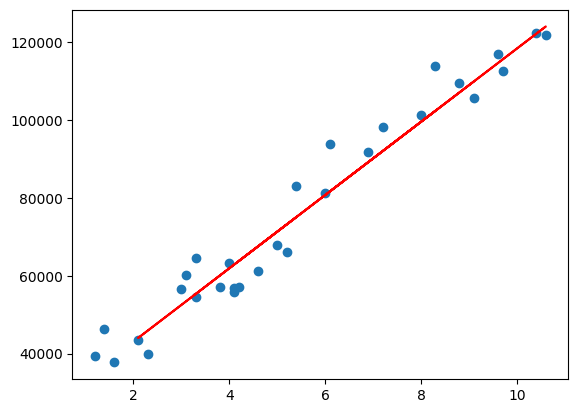

In [23]:
plt.scatter(X,y)
plt.plot(X_test, y_pred, color="red")